In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import collections
import itertools
from textblob import TextBlob

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%run ./keys.ipynb

In [4]:
callback_uri = 'oob'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token,access_token_secret)

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweets = []
likes = []
geo='-33.865143,151.209900,50km'
for tweet in tweepy.Cursor(api.search, q='woolworths', 
                           geocode=geo, 
                           until = "2021-06-30",
                           include_rts='false').items(100):
        tweets.append(tweet.text)
        likes.append(tweet.favorite_count)

df = pd.DataFrame({'Tweet': tweets, 'Likes':likes})

In [7]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [8]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [9]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [10]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [11]:
df = df.drop(df[df['Tweet']==''].index)

In [12]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    elif a>0:
        return "Positive"

In [13]:
df["Analysis"]=df['Polarity'].apply(getTextAnalysis)
df

,Tweet,Likes,Subjectivity,Polarity,Analysis
0,"Woolworths, Coles and IGA have also appeared...",8,0.000000,0.000000,Neutral
1,Believe it or not (BION): The local Woolworth...,0,0.000000,0.000000,Neutral
2,Woolworths offering $5 cash back on a $50 Goog...,0,0.000000,0.000000,Neutral
3,_Volcain People don’t even know what they’re ...,2,0.000000,0.000000,Neutral
4,Tonight's line-up. x Latina Fresh collab from...,3,0.550000,0.275000,Positive
...,...,...,...,...,...
95,"With Sydney in 2-week lockdown, I got a messag...",1,0.000000,-0.033333,Negative
96,"$WBA $TPW Why Atomo, Metcash, Temple &amp; Web...",0,0.700000,0.425000,Positive
97,$WBA Lockdown boosts Woolworths shares (via Th...,0,0.000000,0.000000,Neutral
98,Join and featuring the Sapphire Inspire Awar...,0,0.000000,0.000000,Neutral


In [14]:
# All positive tweets
pos_tweets = []
pos_likes = []
pos_analysis = []
sortedDF_pos = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF_pos.shape[0]):
        if (sortedDF_pos['Analysis'][i] == 'Positive'):
            pos_tweets.append(sortedDF_pos['Tweet'][i])
            pos_likes.append(sortedDF_pos['Likes'][i])
            pos_analysis.append(sortedDF_pos['Analysis'][i])
            
df_pos = pd.DataFrame({'Tweet':pos_tweets, 'Likes':pos_likes, 'Analysis':pos_analysis})
df_pos

,Tweet,Likes,Analysis
0,Tonight's line-up. x Latina Fresh collab from...,3,Positive
1,remember this when your staff allow people ...,0,Positive
2,Another subliminal FREE PROMO for woolworths...,0,Positive
3,woolworths gave me some items I did not order ...,5,Positive
4,Golden Gaytimes are amazing. Woolworths were...,2,Positive
5,Good morning! Just got caught in the rain on m...,0,Positive
6,"Bahahaha, modern art",2,Positive
7,_30 What are they? How much? Where do I...,0,Positive
8,Good morning! Just got caught in the rain on m...,0,Positive
9,CLSA initiates coverage of fresh Woolworths de...,0,Positive


In [15]:
# All negative tweets
neg_tweets = []
neg_likes = []
neg_analysis = []
sortedDF_neg = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF_neg.shape[0]):
        if (sortedDF_neg['Analysis'][i] == 'Negative'):
            neg_tweets.append(sortedDF_neg['Tweet'][i])
            neg_likes.append(sortedDF_neg['Likes'][i])
            neg_analysis.append(sortedDF_neg['Analysis'][i])
            
df_neg = pd.DataFrame({'Tweet':neg_tweets, 'Likes':neg_likes, 'Analysis':neg_analysis})
df_neg

,Tweet,Likes,Analysis
0,Not sure about Woolies Emily but at the Hosp...,4,Negative
1,At least it wasn’t all out war....but MEDIA ...,1,Negative
2,😂😂😂😂😂\nWhat is it with friggen lockdowns and...,2,Negative
3,Young Woolworths customer is blasted over 'pat...,0,Negative
4,Must be Woolworths customers that are thick a...,0,Negative
5,Teach you to buy filthy magazines.,1,Negative
6,_30 Don’t they sell other bags there?,1,Negative
7,“It seems the almost primordial urge to pantry...,0,Negative
8,"Hey your Bourke St, Surry Hills store just de...",0,Negative
9,Stop! Just STOP! \nWhy does this happen every ...,1,Negative


In [16]:
# All neutral tweets
ntl_tweets = []
ntl_likes = []
ntl_analysis = []
sortedDF_ntl = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF_ntl.shape[0]):
        if (sortedDF_ntl['Analysis'][i] == 'Neutral'):
            ntl_tweets.append(sortedDF_ntl['Tweet'][i])
            ntl_likes.append(sortedDF_ntl['Likes'][i])
            ntl_analysis.append(sortedDF_ntl['Analysis'][i])
            
df_ntl = pd.DataFrame({'Tweet':ntl_tweets, 'Likes':ntl_likes, 'Analysis':ntl_analysis})
df_ntl

,Tweet,Likes,Analysis
0,"Woolworths, Coles and IGA have also appeared...",8,Neutral
1,Believe it or not (BION): The local Woolworth...,0,Neutral
2,Woolworths offering $5 cash back on a $50 Goog...,0,Neutral
3,_Volcain People don’t even know what they’re ...,2,Neutral
4,Woolworths offering $5 cash back on a $50 Goog...,0,Neutral
5,Woolworths offering $5 cash back on a $50 Goog...,1,Neutral
6,Turn off wifi. Just use mobile data.,0,Neutral
7,No I have no issues...,1,Neutral
8,Just got a refund from Woolworths for my home ...,1,Neutral
9,_Japan Hi yes you can use the video. I did fil...,0,Neutral


In [17]:
mostliked_neg = df_neg.loc[df_neg.Likes.nlargest(5).index]
df_liked_neg = mostliked_neg.sort_values(by='Likes')
df_liked_neg


,Tweet,Likes,Analysis
1,At least it wasn’t all out war....but MEDIA ...,1,Negative
5,Teach you to buy filthy magazines.,1,Negative
2,😂😂😂😂😂\nWhat is it with friggen lockdowns and...,2,Negative
0,Not sure about Woolies Emily but at the Hosp...,4,Negative
20,"Hey your Bourke St, Surry Hills store just de...",20,Negative


In [18]:
mostliked_pos = df_pos.loc[df_pos.Likes.nlargest(5).index]
df_liked_pos = mostliked_pos.sort_values(by='Likes')
df_liked_pos

,Tweet,Likes,Analysis
4,Golden Gaytimes are amazing. Woolworths were...,2,Positive
6,"Bahahaha, modern art",2,Positive
0,Tonight's line-up. x Latina Fresh collab from...,3,Positive
3,woolworths gave me some items I did not order ...,5,Positive
35,Woolworths has been forced to reintroduce buyi...,71,Positive


In [19]:
df_pos['Tweet'] = df_pos['Tweet'].str.lower()
stop_words = set(stopwords.words('english'))
df_pos['Tweet'] = [' '.join([w for w in x.lower().split() if w not in stop_words])
               for x in df_pos['Tweet'].tolist()]

df_neg['Tweet'] = df_neg['Tweet'].str.lower()
stop_words = set(stopwords.words('english'))
df_neg['Tweet'] = [' '.join([w for w in x.lower().split() if w not in stop_words])
               for x in df_neg['Tweet'].tolist()]

df_ntl['Tweet'] = df_ntl['Tweet'].str.lower()
stop_words = set(stopwords.words('english'))
df_ntl['Tweet'] = [' '.join([w for w in x.lower().split() if w not in stop_words])
               for x in df_ntl['Tweet'].tolist()]

In [20]:
num = 3

In [21]:
df_pos['Tweet'] = df_pos['Tweet'].apply(lambda x: ' '.join([w for w in x.split() 
                                                            if len(w)>num]))
df_neg['Tweet'] = df_neg['Tweet'].apply(lambda x: ' '.join([w for w in x.split() 
                                                            if len(w)>num]))
df_ntl['Tweet'] = df_ntl['Tweet'].apply(lambda x: ' '.join([w for w in x.split() 
                                                            if len(w)>num]))

In [22]:
pos_phrases = df_pos['Tweet'].apply(lambda x: list(ngrams(x.split(), num)))
neg_phrases = df_neg['Tweet'].apply(lambda x: list(ngrams(x.split(), num)))
ntl_phrases = df_ntl['Tweet'].apply(lambda x: list(ngrams(x.split(), num)))

In [23]:
all_pos_phrases = list(itertools.chain(*pos_phrases))
pos_counts = collections.Counter(all_pos_phrases)

all_neg_phrases = list(itertools.chain(*neg_phrases))
neg_counts = collections.Counter(all_neg_phrases)

all_ntl_phrases = list(itertools.chain(*ntl_phrases))
ntl_counts = collections.Counter(all_ntl_phrases)

In [24]:
most_pos_count = pd.DataFrame(pos_counts.most_common(30),
                         columns = ['Phrases of 3 words', 'Count'])
most_pos_count['Phrases of 3 words'] = most_pos_count['Phrases of 3 words'].apply(lambda x: ' '.join([w for w in x]))


most_neg_count = pd.DataFrame(neg_counts.most_common(30),
                         columns = ['Phrases of 3 words', 'Count'])
most_neg_count['Phrases of 3 words'] = most_neg_count['Phrases of 3 words'].apply(lambda x: ' '.join([w for w in x]))


most_ntl_count = pd.DataFrame(ntl_counts.most_common(30),
                         columns = ['Phrases of 3 words', 'Count'])
most_ntl_count['Phrases of 3 words'] = most_ntl_count['Phrases of 3 words'].apply(lambda x: ' '.join([w for w in x]))


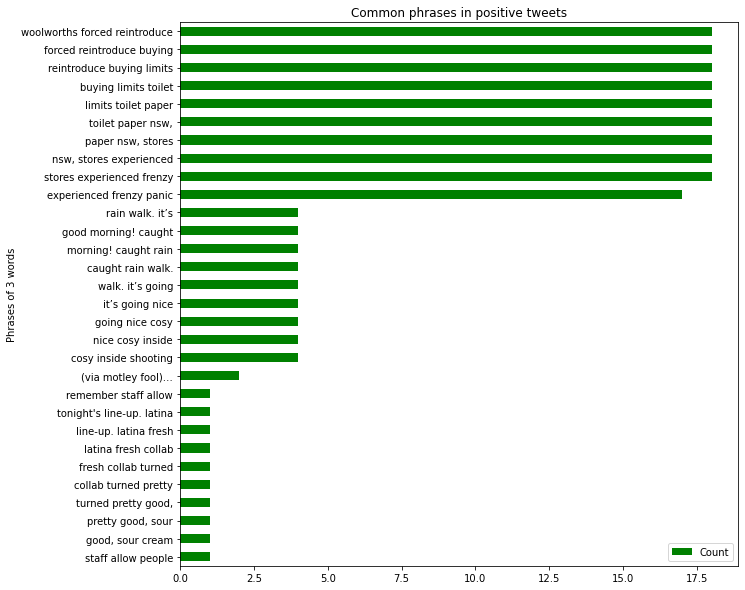

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

most_pos_count.sort_values(by='Count').plot.barh(x='Phrases of 3 words',
                                             y='Count',
                                             ax=ax,
                                             color="green")
ax.set_title("Common phrases in positive tweets")
plt.show()

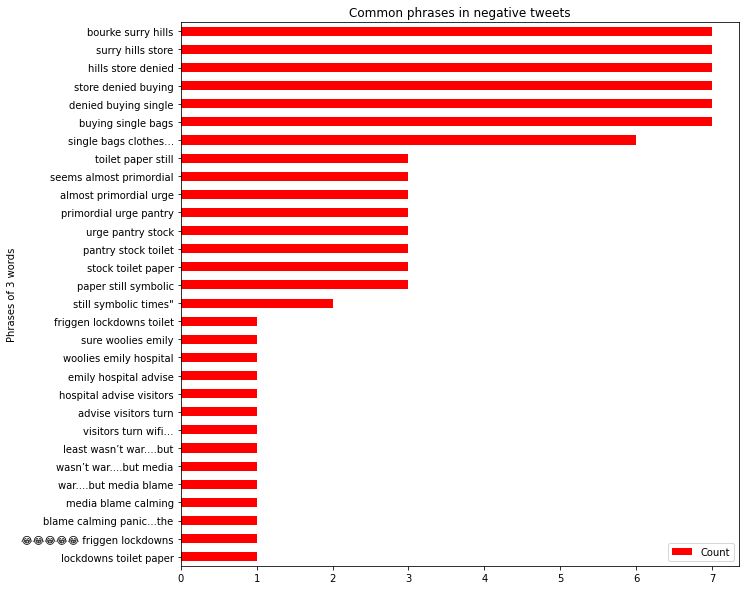

In [28]:
fig, ax = plt.subplots(figsize=(10,10))

most_neg_count.sort_values(by='Count').plot.barh(x='Phrases of 3 words',
                                             y='Count',
                                             ax=ax,
                                             color="red")
ax.set_title("Common phrases in negative tweets")
plt.show()

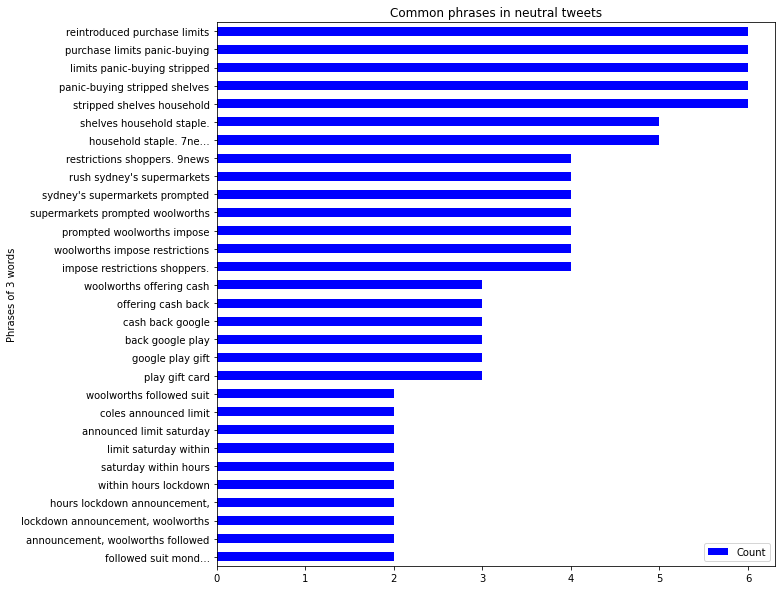

In [29]:
fig, ax = plt.subplots(figsize=(10,10))

most_ntl_count.sort_values(by='Count').plot.barh(x='Phrases of 3 words',
                                             y='Count',
                                             ax=ax,
                                             color="blue")
ax.set_title("Common phrases in neutral tweets")
plt.show()